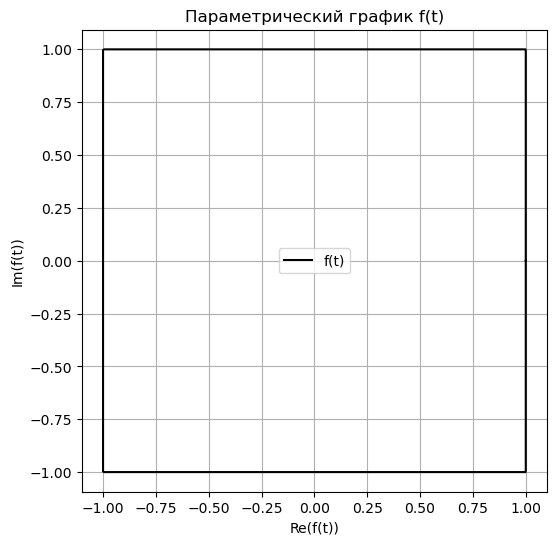

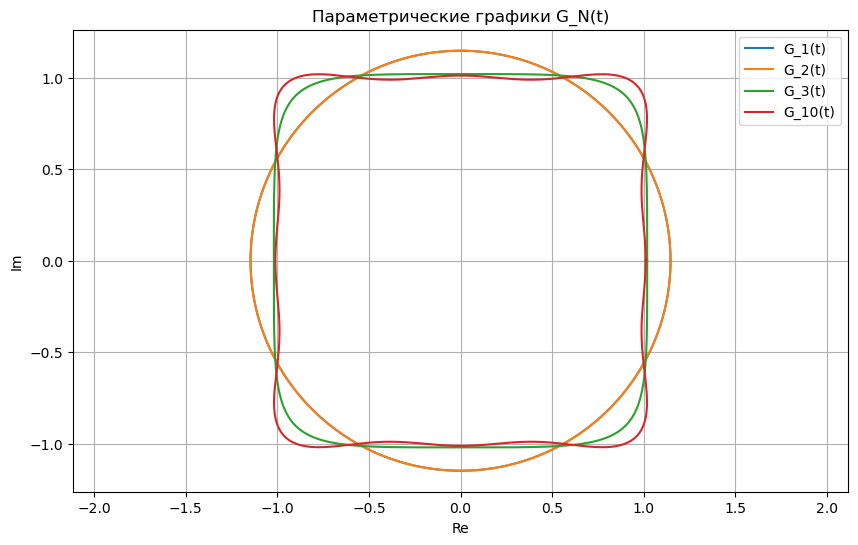

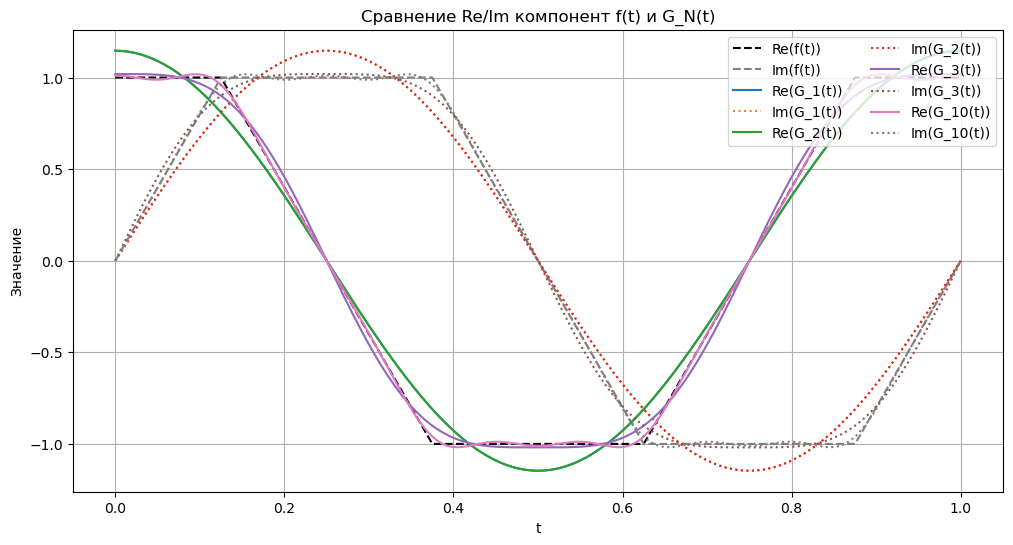

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Параметры
R = 1
T = 1
omega = lambda n: 2 * np.pi * n / T

# Определение кусочной функции f(t)
def ref(t):
    if 0 <= t < 1/8:
        return R
    elif 1/8 <= t < 3/8:
        return 2*R - 8*R*t
    elif 3/8 <= t < 5/8:
        return -R
    elif 5/8 <= t < 7/8:
        return -6*R + 8*R*t
    elif 7/8 <= t < 1:
        return R
    else:
        return 0

def imf(t):
    if 0 <= t < 1/8:
        return 8*R*t
    elif 1/8 <= t < 3/8:
        return R
    elif 3/8 <= t < 5/8:
        return 4*R - 8*R*t
    elif 5/8 <= t < 7/8:
        return -R
    elif 7/8 <= t < 1:
        return -8*R + 8*R*t
    else:
        return 0

def f(t):
    t_mod = t % T
    return ref(t_mod) + 1j * imf(t_mod)

# Вычисление коэффициентов Фурье
def c_n(n):
    real_integrand = lambda t: np.real(f(t) * np.exp(-1j * omega(n) * t))
    imag_integrand = lambda t: np.imag(f(t) * np.exp(-1j * omega(n) * t))
    integral_real = quad(real_integrand, 0, T)[0]
    integral_imag = quad(imag_integrand, 0, T)[0]
    return (integral_real + 1j * integral_imag) / T

# Частичная сумма G_N(t)
def G_N(t, N):
    return sum(c_n(n) * np.exp(1j * omega(n) * t) for n in range(-N, N+1))

# Подготовка значений
t_vals = np.linspace(0, T, 1000)
f_vals = np.array([f(t) for t in t_vals])

# Параметрический график исходной функции
plt.figure(figsize=(6, 6))
plt.plot(f_vals.real, f_vals.imag, label="f(t)", color='black')
plt.title("Параметрический график f(t)")
plt.xlabel("Re(f(t))")
plt.ylabel("Im(f(t))")
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.savefig("parametric_plot.png")

# Параметрические графики G_N(t)
N_vals = [1, 2, 3, 10]
plt.figure(figsize=(10, 6))
for N in N_vals:
    g_vals = np.array([G_N(t, N) for t in t_vals])
    plt.plot(g_vals.real, g_vals.imag, label=f"G_{N}(t)")
plt.title("Параметрические графики G_N(t)")
plt.xlabel("Re")
plt.ylabel("Im")
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.savefig("gn_parametric.png")

# Re/Im сравнение
plt.figure(figsize=(12, 6))
plt.plot(t_vals, [f.real for f in f_vals], label="Re(f(t))", color="black", linestyle="--")
plt.plot(t_vals, [f.imag for f in f_vals], label="Im(f(t))", color="gray", linestyle="--")
for N in N_vals:
    g_vals = np.array([G_N(t, N) for t in t_vals])
    plt.plot(t_vals, g_vals.real, label=f"Re(G_{N}(t))")
    plt.plot(t_vals, g_vals.imag, label=f"Im(G_{N}(t))", linestyle=":")
plt.title("Сравнение Re/Im компонент f(t) и G_N(t)")
plt.xlabel("t")
plt.ylabel("Значение")
plt.grid(True)
plt.legend(loc="upper right", ncol=2)
plt.savefig("re_im_comparison.png")

plt.show()
